# ✔️ 사전 세팅

In [ ]:
# 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Pandas 보기 옵션
pd.set_option('display.max_columns',100)

# 폰트 설정
plt.figure(figsize=(20, 15))
plt.rc('font', family='Malgun Gothic')
# # plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 한글 폰트 깨지는지 테스트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get install -y fonts-nanum
!fc-cache -fv

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.text(0.5, 0.5, '안녕하세요, 나눔고딕!', ha='center', va='center', size=24)
plt.show()

---

# ✔️ 데이터 불러오기

In [ ]:
df = pd.read_csv("data\hotel_bookings.csv", encoding='cp949')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,394.0,NaN,0,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,9.0,NaN,0,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,9.0,NaN,0,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,89.0,NaN,0,0,0,Check-Out,2017-09-07


---

# ✔️ 1. 데이터 전처리

In [15]:
# Data 형태 확인
print('df :', df.shape)
# Data type 확인
print(df.info())

df : (119390, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12

In [16]:
# 데이터 값 확인
df.head(30)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,303.0,NaN,0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,15.0,NaN,0,0,0,Canceled,2015-04-22


### **결측치 확인**

In [17]:
# 결측치 확인
missing_data = df.isna().sum()
print(missing_data)
# type(missing_data)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_

<변수 정리>
- market_segment: 고객이 호텔을 처음 접한 방법
- distribution_channel: 호텔 예약이 실제로 처리된 방식
- agent: 호텔 예약을 처리한 여행사(Travel Agency)의 ID
- company: 호텔 예약을 처리한 회사(Corporate)의 ID

→ agent와 company가 NaN인데 distribution_channel가 Direct가 아니라면 결측치로 판단했다.

- 데이터 원본 사이트에서 **agent, company가 "NaN"로 정의된 경우 예약이 여행사, 회사를 거치지 않는 것**이라는 정보를 추가로 확인했다.


In [30]:
# agent, company를 거치지 않았다는 의미에서 0으로 전처리
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# 국적을 모르는 고객은 Unknown으로 전처리
df['country'].fillna('Unknown', inplace=True)

# 최빈값인 0.0으로 전처리
children_mode = df['children'].mode()[0]
df['children'].fillna(children_mode, inplace=True)

# agent와 company가 0인데 distribution_channel이 Direct가 아닌 행 삭제
df = df[~((df['agent'] == 0) & (df['company'] == 0) & (df['distribution_channel'] != 'Direct'))]

missing_data = df.isna().sum()
print(missing_data)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

## **중복값 확인**
→ 중복값 확인 결과, 데이터셋에 예약을 특정할 수 있는 고유 ID는 없기 때문에
**우연히 겹친 데이터들이라고 판단하여 삭제하지 않았다.**

In [19]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,0.0,0,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,250.0,0.0,0,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,250.0,0.0,0,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,240.0,0.0,0,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,0.0,0,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,9.0,0.0,0,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,9.0,0.0,0,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,9.0,0.0,0,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,9.0,0.0,0,0,2,Check-Out,2017-09-03


## **데이터 정리**
- 이상치 제거가 필요한 데이터셋이라고 판단되지 않아 진행하지 않았다.
1. 모순 데이터 제거 (다양한 사람들이 모이는 해외라는 점을 고려해 **완전 모순인 데이터만 제거했다.**)
2. 일부 데이터 형식을 변경했다.

In [31]:
# adults, children, babies가 모두 0인 데이터 삭제
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

In [32]:
# 첫 방문인데 과거 예약 이력이 있는 데이터 삭제
df = df[~((df['is_repeated_guest'] == 0) & ((df['previous_cancellations'] > 0) | (df['previous_bookings_not_canceled'] > 0)))]

In [33]:
# 성인이 0명인데 주차공간을 요구하는 데이터 삭제
df = df[~((df['adults'] == 0) & (df['required_car_parking_spaces'] > 0))]

In [34]:
# children 변수를 float → int로 변환
df['children'] = df['children'].astype(int)
print(df['children'].dtypes)

int64


In [35]:
# 월 이름을 숫자로 매핑
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)
df['arrival_date_month']

,arrival_date_month
0,7
1,7
2,7
3,7
4,7
...,...
119385,8
119386,8
119387,8
119388,8


In [36]:
# agent, company는 원활한 시각화를 위해 float → int → str로 변경
df['agent'] = df['agent'].astype(int).astype(str)
df['company'] = df['company'].astype(int).astype(str)

print(df[['agent', 'company']].dtypes)

agent      object
company    object
dtype: object


---

# ✔️ 2. 개별 데이터 살펴보기

## **범주형, 수치형 데이터 분리**

In [89]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,int64
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [18]:
# 범주형/ 문자형 변수 추출
cat_cols = df.select_dtypes(include=['object']).columns
# 수치형 변수 추출
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [91]:
# 범주형 데이터
df[cat_cols]

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,agent,company,reservation_status,reservation_status_date
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,0,0,Check-Out,2015-07-01
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,0,0,Check-Out,2015-07-01
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,0,0,Check-Out,2015-07-02
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,304,0,Check-Out,2015-07-02
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,240,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,BEL,Offline TA/TO,TA/TO,A,A,394,0,Check-Out,2017-09-06
119386,City Hotel,BB,FRA,Online TA,TA/TO,E,E,9,0,Check-Out,2017-09-07
119387,City Hotel,BB,DEU,Online TA,TA/TO,D,D,9,0,Check-Out,2017-09-07
119388,City Hotel,BB,GBR,Online TA,TA/TO,A,A,89,0,Check-Out,2017-09-07


In [92]:
# 수치형 데이터
df[num_cols]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,7,27,1,0,0,2,0,0,0,0,0,3,0,0,0
1,0,737,2015,7,27,1,0,0,2,0,0,0,0,0,4,0,0,0
2,0,7,2015,7,27,1,0,1,1,0,0,0,0,0,0,0,0,0
3,0,13,2015,7,27,1,0,1,1,0,0,0,0,0,0,0,0,0
4,0,14,2015,7,27,1,0,2,2,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0,0,0,0,0,0,0,0,0
119386,0,102,2017,8,35,31,2,5,3,0,0,0,0,0,0,0,0,2
119387,0,34,2017,8,35,31,2,5,2,0,0,0,0,0,0,0,0,4
119388,0,109,2017,8,35,31,2,5,2,0,0,0,0,0,0,0,0,0


## **수치형 데이터 분석**

In [93]:
# 수치형 변수의 기술 통계량
numeric_summary = df[num_cols].describe()
numeric_summary

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000,110195.000000
mean,0.336494,98.537021,2016.194673,6.498752,26.929797,15.825119,0.938582,2.531494,1.867308,0.111030,0.008476,0.032787,0.015327,0.122211,0.227052,2.251173,0.064613,0.601497
std,0.472512,103.176477,0.690293,3.075055,13.557608,8.801028,0.999711,1.913870,0.583187,0.411226,0.100730,0.178080,0.261323,1.472594,0.648842,18.032060,0.247058,0.802092
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,65.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,151.000000,2017.000000,9.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,18.000000,42.000000,55.000000,10.000000,10.000000,1.000000,21.000000,72.000000,18.000000,391.000000,3.000000,5.000000


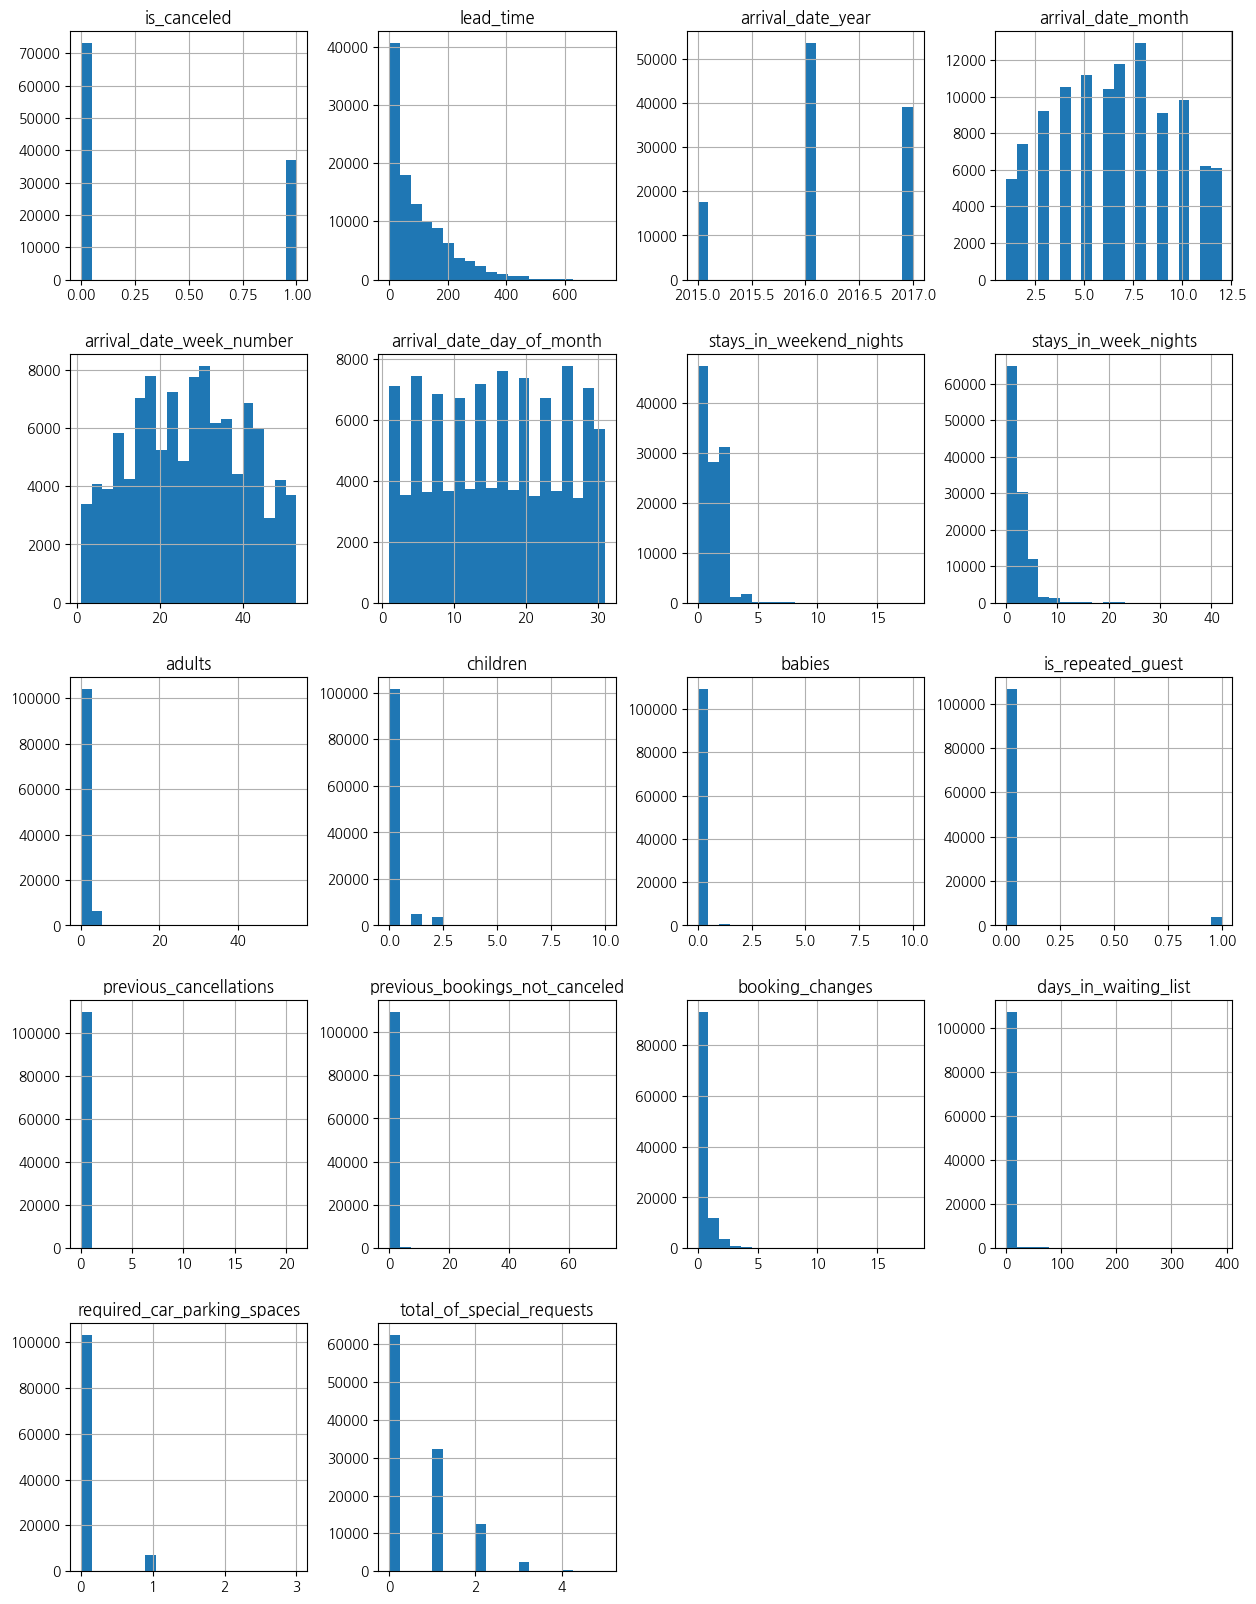

In [94]:
df[num_cols].hist(bins=20, figsize=(15, 20))
plt.show()

수치형 변수의 기술 통계량을 분석했을 때,
- 대부분의 수치형 데이터는 비교적 정규 분포를 보인다.
- 그러나, **lead_time는 표준편차 값이 상대적으로 높아** 이후 관계 분석 시 주의 깊게 살펴보아야 할 것 같다.
- adults의 최댓값이 55인 데이터와 days_in_waiting_list의 최댓값이 391인 데이터는 이상치가 존재할 가능성을 시사한다.


## **범주형 데이터 분석**

In [95]:
# 범주형 변수의 분포
df[cat_cols].describe()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,agent,company,reservation_status,reservation_status_date
count,110195,110195,110195,110195,110195,110195,110195,110195,110195,110195,110195
unique,2,5,178,7,5,9,10,334,346,3,900
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,9,0,Check-Out,2015-10-21
freq,72654,84716,40894,55523,90209,77716,66437,31572,103939,73115,1456


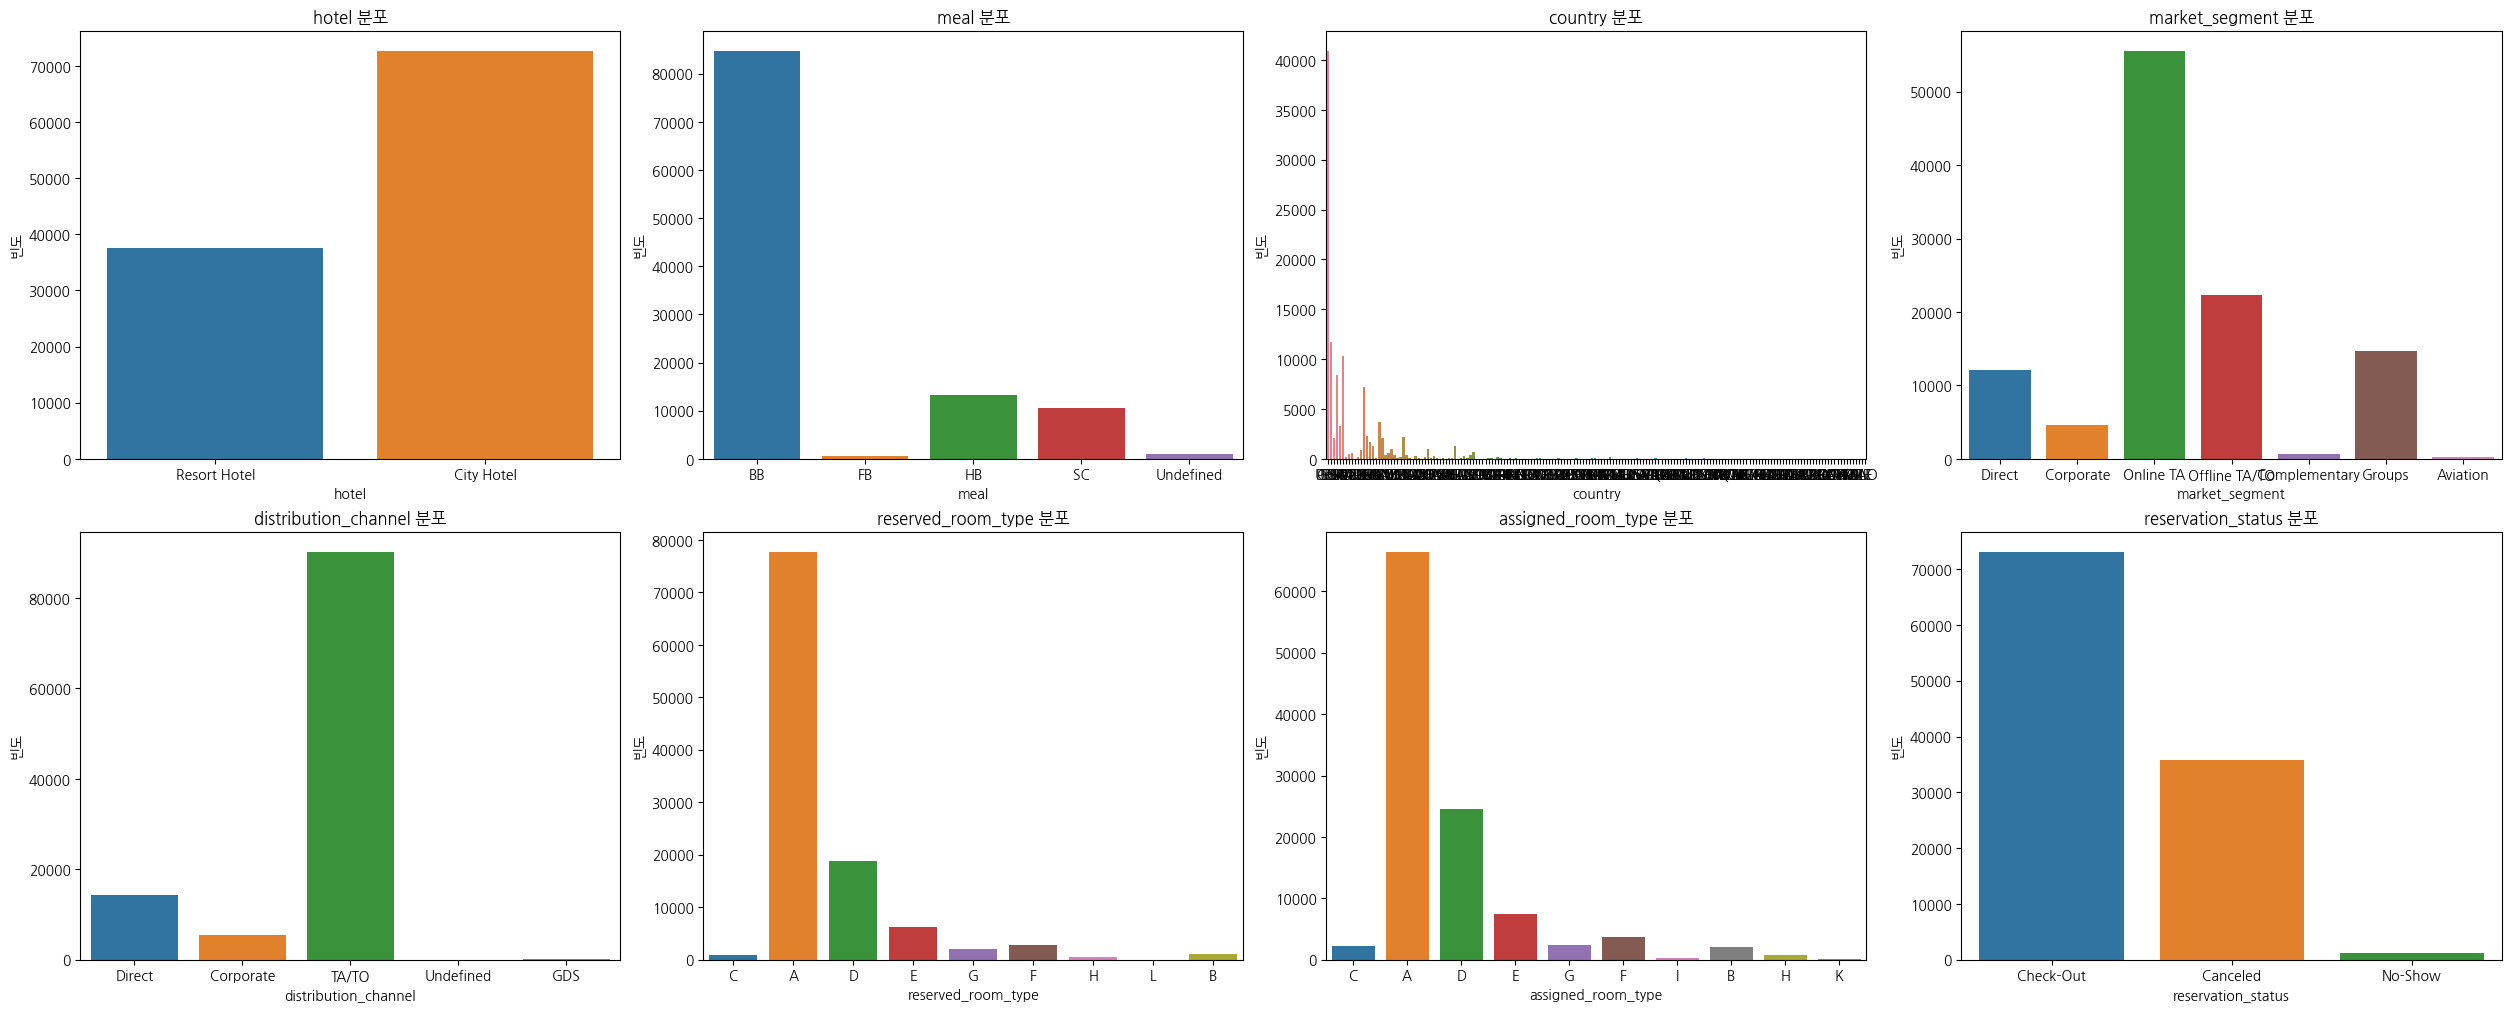

In [ ]:
plot_info = [
    {'col': 'hotel', 'title': 'hotel 분포', 'xlabel': 'hotel'},
    {'col': 'meal', 'title': 'meal 분포', 'xlabel': 'meal'},
    {'col': 'country', 'title': 'country 분포', 'xlabel': 'country'},
    {'col': 'market_segment', 'title': 'market_segment 분포', 'xlabel': 'market_segment'},
    {'col': 'distribution_channel', 'title': 'distribution_channel 분포', 'xlabel': 'distribution_channel'},
    {'col': 'reserved_room_type', 'title': 'reserved_room_type 분포', 'xlabel': 'reserved_room_type'},
    {'col': 'assigned_room_type', 'title': 'assigned_room_type 분포', 'xlabel': 'assigned_room_type'},
    {'col': 'reservation_status', 'title': 'reservation_status 분포', 'xlabel': 'reservation_status'},
]

fig, axes = plt.subplots(2, 4, figsize=(25, 10), constrained_layout=True)

# 시각화
for ax, info in zip(axes.flatten(), plot_info):
    sns.countplot(x=info['col'], data=df, ax=ax, hue=info['col'], legend=False)
    ax.set_title(info['title'])
    ax.set_xlabel(info['xlabel'])
    ax.set_ylabel('빈도')

plt.show()

범주형 변수의 분포를 분석했을 때,
- 두 호텔 모두 포르투갈에 위치하기 때문에 국적이 포르투갈(PRT)인 고객이 가장 많다.
- 고객들이 가장 많이 호텔을 처음 접한 방법은 Online TA이며, 가장 많이 예약이 처리된 방식은 TA/TO다.
- resort hotel보다 **city hotel의 고객 수가 더 많다**.
- **예약 성사와 예약 취소 비율은 2:1** 정도이다.

---

# ✔️ 3. resort hotel과 city hotel 데이터 비교 분석

## **두 호텔의 취소 건수와 예약 성사 건수 추이 시각화**

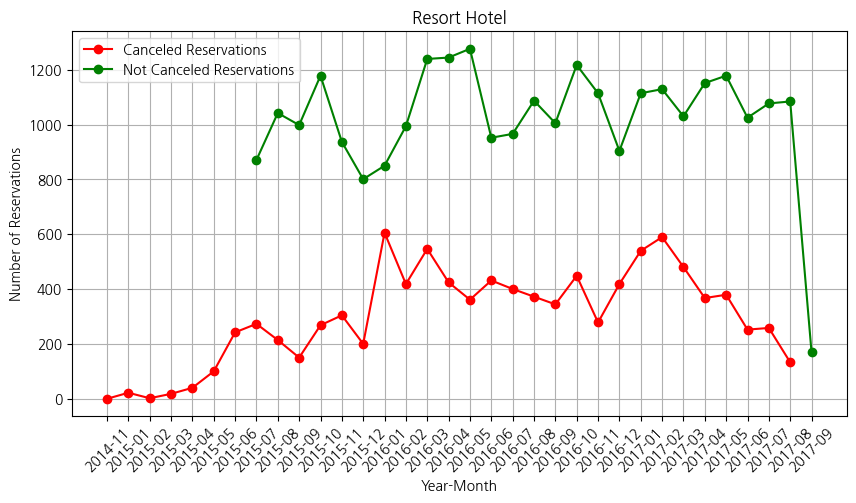

In [34]:
# Resort Hotel에서 취소 건수와 예약 성사 건수 추이 시각화
resort_canceled = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)].copy()
resort_not_canceled = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)].copy()

resort_canceled['reservation_status_date'] = pd.to_datetime(resort_canceled['reservation_status_date'])
resort_not_canceled['reservation_status_date'] = pd.to_datetime(resort_not_canceled['reservation_status_date'])

resort_canceled['year_month'] = resort_canceled['reservation_status_date'].dt.to_period('M')
resort_not_canceled['year_month'] = resort_not_canceled['reservation_status_date'].dt.to_period('M')

monthly_cancellations = resort_canceled.groupby('year_month').size()
monthly_not_cancellations = resort_not_canceled.groupby('year_month').size()

monthly_cancellations.index = monthly_cancellations.index.astype(str)
monthly_not_cancellations.index = monthly_not_cancellations.index.astype(str)

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(monthly_cancellations, label='Canceled Reservations', marker='o', color='red')
plt.plot(monthly_not_cancellations, label='Not Canceled Reservations', marker='o', color='green')
plt.title('Resort Hotel')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

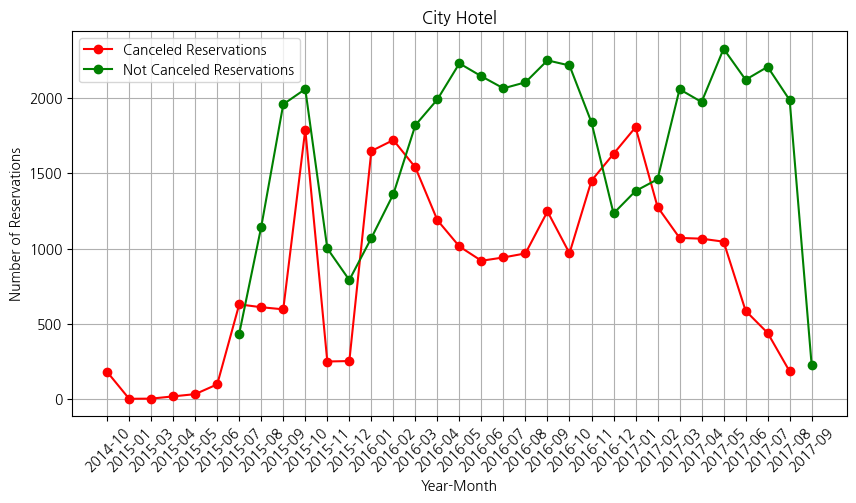

In [35]:
# City Hotel에서 취소 건수와 예약 성사 건수 추이 시각화
resort_canceled = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 1)].copy()
resort_not_canceled = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)].copy()

resort_canceled['reservation_status_date'] = pd.to_datetime(resort_canceled['reservation_status_date'])
resort_not_canceled['reservation_status_date'] = pd.to_datetime(resort_not_canceled['reservation_status_date'])

resort_canceled['year_month'] = resort_canceled['reservation_status_date'].dt.to_period('M')
resort_not_canceled['year_month'] = resort_not_canceled['reservation_status_date'].dt.to_period('M')

monthly_cancellations = resort_canceled.groupby('year_month').size()
monthly_not_cancellations = resort_not_canceled.groupby('year_month').size()

monthly_cancellations.index = monthly_cancellations.index.astype(str)
monthly_not_cancellations.index = monthly_not_cancellations.index.astype(str)

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(monthly_cancellations, label='Canceled Reservations', marker='o', color='red')
plt.plot(monthly_not_cancellations, label='Not Canceled Reservations', marker='o', color='green')
plt.title('City Hotel')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

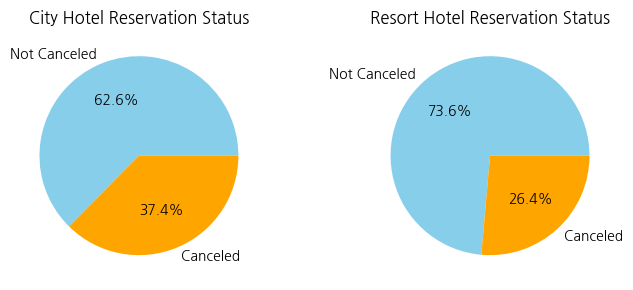

In [36]:
hotel_status = df.groupby(['hotel', 'is_canceled']).size().reset_index(name='num_of_reservations')
hotel_status['status'] = hotel_status['is_canceled'].replace({0: 'Not Canceled', 1: 'Canceled'})

city_data = hotel_status[hotel_status['hotel'] == 'City Hotel']
resort_data = hotel_status[hotel_status['hotel'] == 'Resort Hotel']

# City Hotel 원형 그래프
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.pie(city_data['num_of_reservations'], labels=city_data['status'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('City Hotel Reservation Status')

# Resort Hotel 원형 그래프
plt.subplot(1, 2, 2)
plt.pie(resort_data['num_of_reservations'], labels=resort_data['status'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Resort Hotel Reservation Status')

plt.tight_layout()
plt.show()

Resort Hotel에 비해 **City Hotel의 예약 취소 건수는 일관적이지 않으며, 예약 성사 건수 대비 높은 취소율**을 보여준다.

## **두 호텔의 월별 고객 수**

In [37]:
# Resort Hotel의 월별 고객 수
resort_not_canceled = df[(df['hotel'] == 'Resort Hotel')].copy()

resort_guests = resort_not_canceled['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','num of guests']
resort_guests

,month,num of guests
0,8,4765
1,7,4422
2,4,3394
3,5,3368
4,3,3137
5,10,3063
6,6,2922
7,2,2890
8,9,2712
9,12,2503


In [38]:
# City Hotel의 월별 고객 수
resort_not_canceled = df[(df['hotel'] == 'City Hotel')].copy()

city_guests = resort_not_canceled['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','num of guests']
city_guests

,month,num of guests
0,8,8153
1,5,7829
2,6,7513
3,7,7334
4,4,7149
5,10,6745
6,9,6411
7,3,6073
8,2,4510
9,11,3913


In [39]:
# 두 호텔의 고객 수 병합
final_guests = city_guests.merge(resort_guests, on='month')
final_guests.columns = ['month', 'num of City hotel guests', 'num of Resort hotel guests']

final_guests['month'] = final_guests['month'].astype(int)
final_guests_sorted = final_guests.sort_values(by='month').reset_index(drop=True)

final_guests_sorted

,month,num of City hotel guests,num of Resort hotel guests
0,1,3422,2063
1,2,4510,2890
2,3,6073,3137
3,4,7149,3394
4,5,7829,3368
5,6,7513,2922
6,7,7334,4422
7,8,8153,4765
8,9,6411,2712
9,10,6745,3063


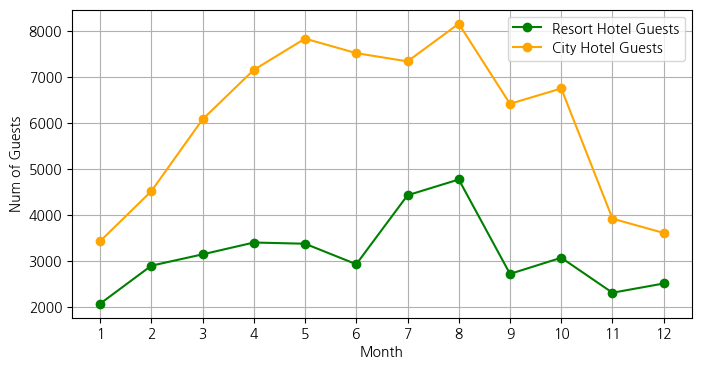

In [40]:
plt.figure(figsize=(8, 4))

# Resort Hotel 고객 수
plt.plot(final_guests_sorted['month'], final_guests_sorted['num of Resort hotel guests'], marker='o', color='green', label='Resort Hotel Guests')

# City Hotel 고객 수
plt.plot(final_guests_sorted['month'], final_guests_sorted['num of City hotel guests'], marker='o', color='orange', label='City Hotel Guests')

plt.xlabel('Month')
plt.ylabel('Num of Guests')
plt.xticks(final_guests_sorted['month'])
plt.legend()
plt.grid(True)
plt.show()

 City Hotel과 Resort Hotel 모두 **여름에 고객 수가 늘며, 겨울이 되면 고객 수가 줄어든다**.

## **두 호텔의 고객 숙박일**

In [41]:
# 주중 + 주말 = total_nights 새로운 열 만들기
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights' ]

nights_count = df.groupby(['hotel', 'total_nights']).size().reset_index(name='num_of_guests')
nights_count

,hotel,total_nights,num_of_guests
0,City Hotel,0,261
1,City Hotel,1,12389
2,City Hotel,2,18462
3,City Hotel,3,19810
4,City Hotel,4,11905
...,...,...,...
67,Resort Hotel,42,4
68,Resort Hotel,45,1
69,Resort Hotel,46,1
70,Resort Hotel,56,2


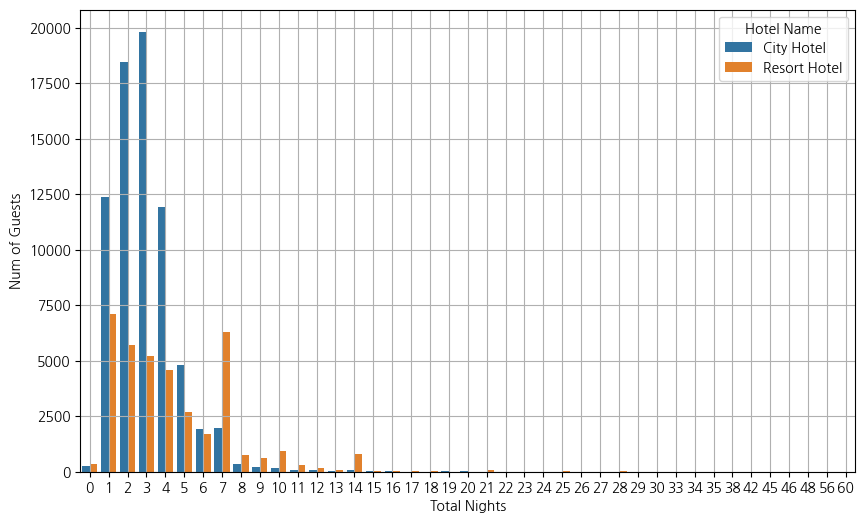

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=nights_count, x='total_nights', y='num_of_guests', hue='hotel')
plt.xlabel('Total Nights')
plt.ylabel('Num of Guests')
plt.grid(True)
plt.legend(title='Hotel Name')
plt.show()

City Hotel은 4일 이하로 단기 숙박하는 고객이 많은 반면, **Resort Hotel은 7일 이상 장기 숙박하는 고객이 많다**.

---

# ✔️ 4. 속성 간의 관계 분석

## **수치형 변수 간 상관 관계**

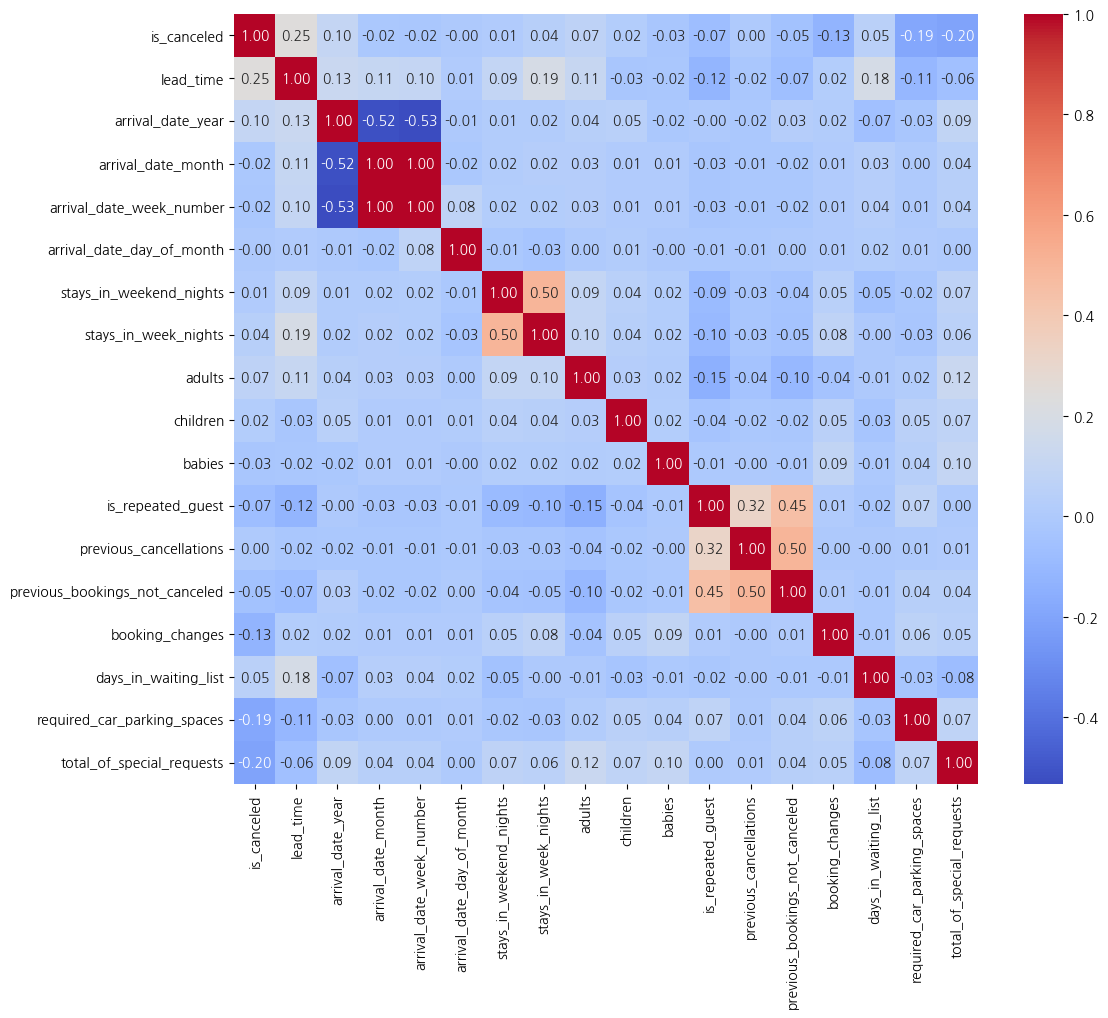

In [44]:
# 수치형 변수 간 상관 관계
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.show()

상관 관계가 있는 것
- stays_in_weekend_nights와 stays_in_week_nights (0.50): 주말 숙박 일수가 많을수록 평일 숙박 일수도 많다.
- previous_cancellations와 previous_bookings_not_canceled (0.50): 과거에 예약을 여러 번 한 고객은 취소한 적도 있고 취소하지 않은 적도 있다.
- total_of_special_requests와 adults (0.60): 고객 수가 많을수록 특별 요청이 많다.

## **is_canceled 변수와 다른 변수들 간 상관 관계**

In [45]:
corr_matrix = df[num_cols].corr()

# is_canceled 변수와 다른 변수들 간 상관 관계 출력
is_canceled_corr = corr_matrix['is_canceled'].sort_values(ascending=False)
is_canceled_corr

,is_canceled
is_canceled,1.000000
lead_time,0.245031
arrival_date_year,0.097727
adults,0.066069
days_in_waiting_list,0.049589
stays_in_week_nights,0.040473
children,0.023445
stays_in_weekend_nights,0.008384
previous_cancellations,0.002768
arrival_date_day_of_month,-0.000994


### **1️. lead_time과 예약 취소율 간의 관계**

In [54]:
lead_time_cancellation = df.groupby('lead_time')['is_canceled'].agg(['count', 'sum']).reset_index()
lead_time_cancellation.columns = ['lead_time', 'total_reservations', 'canceled_reservations']

# lead_time별 취소율
lead_time_cancellation['cancellation_rate'] = (lead_time_cancellation['canceled_reservations'] / lead_time_cancellation['total_reservations']) * 100

lead_time_cancellation

,lead_time,total_reservations,canceled_reservations,cancellation_rate
0,0,5961,409,6.861265
1,1,3273,314,9.593645
2,2,1961,198,10.096889
3,3,1747,172,9.845449
4,4,1645,164,9.969605
...,...,...,...,...
471,622,17,17,100.000000
472,626,30,30,100.000000
473,629,17,17,100.000000
474,709,1,0,0.000000


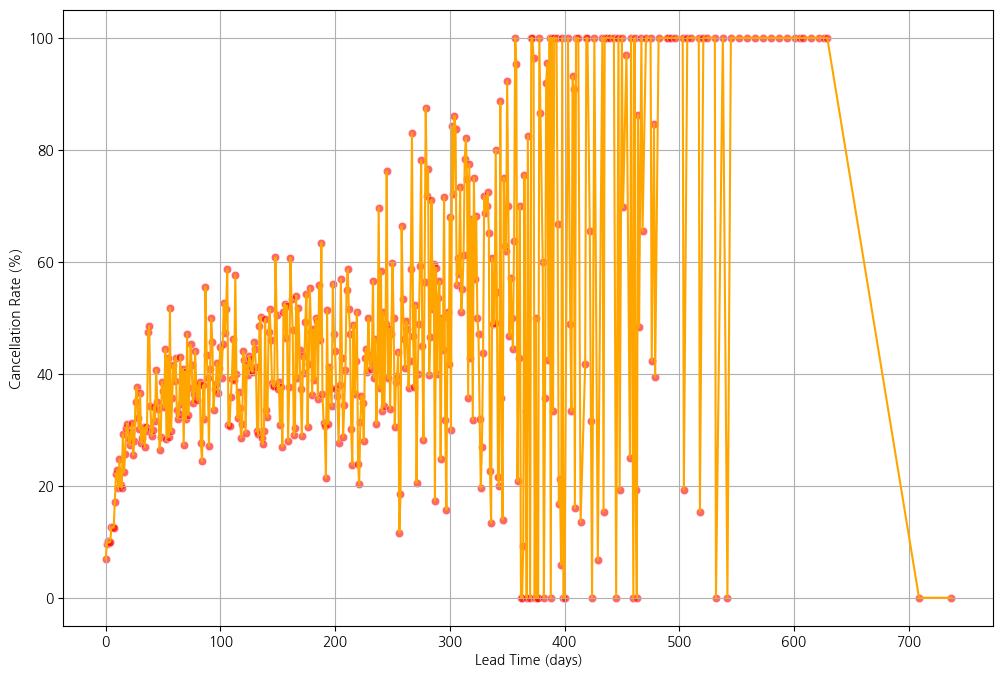

In [56]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=lead_time_cancellation, x='lead_time', y='cancellation_rate', color='red', alpha=0.6)
sns.lineplot(data=lead_time_cancellation, x='lead_time', y='cancellation_rate', color='orange')

plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.show()

위 시각화에서 확인할 수 있는 독특한 점이 있다. <br>
**대기일이 300일이 넘어가는 시점부터 취소율이 0%이거나 100%인 극단으로 가는 경향**을 보인다. <br> 이는 크리스마스, 새해 등의 이벤트를 위한 예약이거나, 회사나 단체의 예약으로 유추할 수 있다. <br> 즉, 일반적인 예약이 아닌 특수한 유형의 예약일 것이라는 추측이다.

혹은 **장기 대기일 오류로 발생한 이상치일 확률**도 있을 것이다.

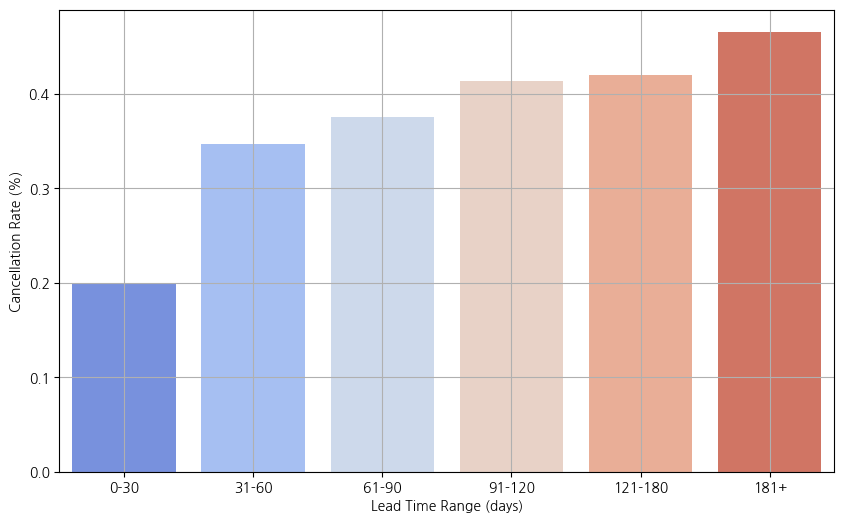

In [58]:
# 구간별 lead_time
df['lead_time_range'] = pd.cut(df['lead_time'], bins=[0, 30, 60, 90, 120, 180, 365], labels=['0-30', '31-60', '61-90', '91-120', '121-180', '181+'])

# 구간별 취소율
lead_time_range_cancellation = df.groupby('lead_time_range')['is_canceled'].agg(['count', 'mean']).reset_index()
lead_time_range_cancellation.columns = ['lead_time_range', 'total_reservations', 'cancellation_rate']

plt.figure(figsize=(10, 6))
sns.barplot(data=lead_time_range_cancellation, x='lead_time_range', y='cancellation_rate', palette='coolwarm')
plt.xlabel('Lead Time Range (days)')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.show()

0-30일까지는 상대적으로 낮은 취소율을 보여주지만, <br>
한 달이 넘어가는 시점부터 취소율이 10% 가량 증가한 것을 확인할 수 있다. <br>
이를 통해 **lead_time이 증가할수록 취소율도 증가한다**는 결론을 얻을 수 있다.

### **2. 국적과 예약 취소율 간의 관계**

In [37]:
country_cancellation = df.groupby('country')['is_canceled'].agg(['count', 'sum']).reset_index()
country_cancellation.columns = ['country', 'total_reservations', 'canceled_reservations']

# 국적별 취소율
country_cancellation['cancellation_rate'] = (country_cancellation['canceled_reservations'] / country_cancellation['total_reservations']) * 100

# 총 예약 수가 10개 이상인 국가 필터링
filtered_countries = country_cancellation[country_cancellation['total_reservations'] >= 10]
filtered_countries = filtered_countries.sort_values(by='cancellation_rate', ascending=False)

filtered_countries

,country,total_reservations,canceled_reservations,cancellation_rate
102,MAC,16,15,93.750000
69,HKG,29,26,89.655172
5,ARE,51,43,84.313725
106,MDV,12,9,75.000000
18,BGD,12,9,75.000000
...,...,...,...,...
38,CRI,19,1,5.263158
149,SRB,101,3,2.970297
33,CMR,10,0,0.000000
24,BOL,10,0,0.000000


In [ ]:
import plotly.express as px

# 세계 지도에 표시
fig = px.choropleth(
    filtered_countries,
    locations="country",
    locationmode="ISO-3",
    color="cancellation_rate",
    hover_name="country",
    color_continuous_scale="Reds",
)

fig.show()

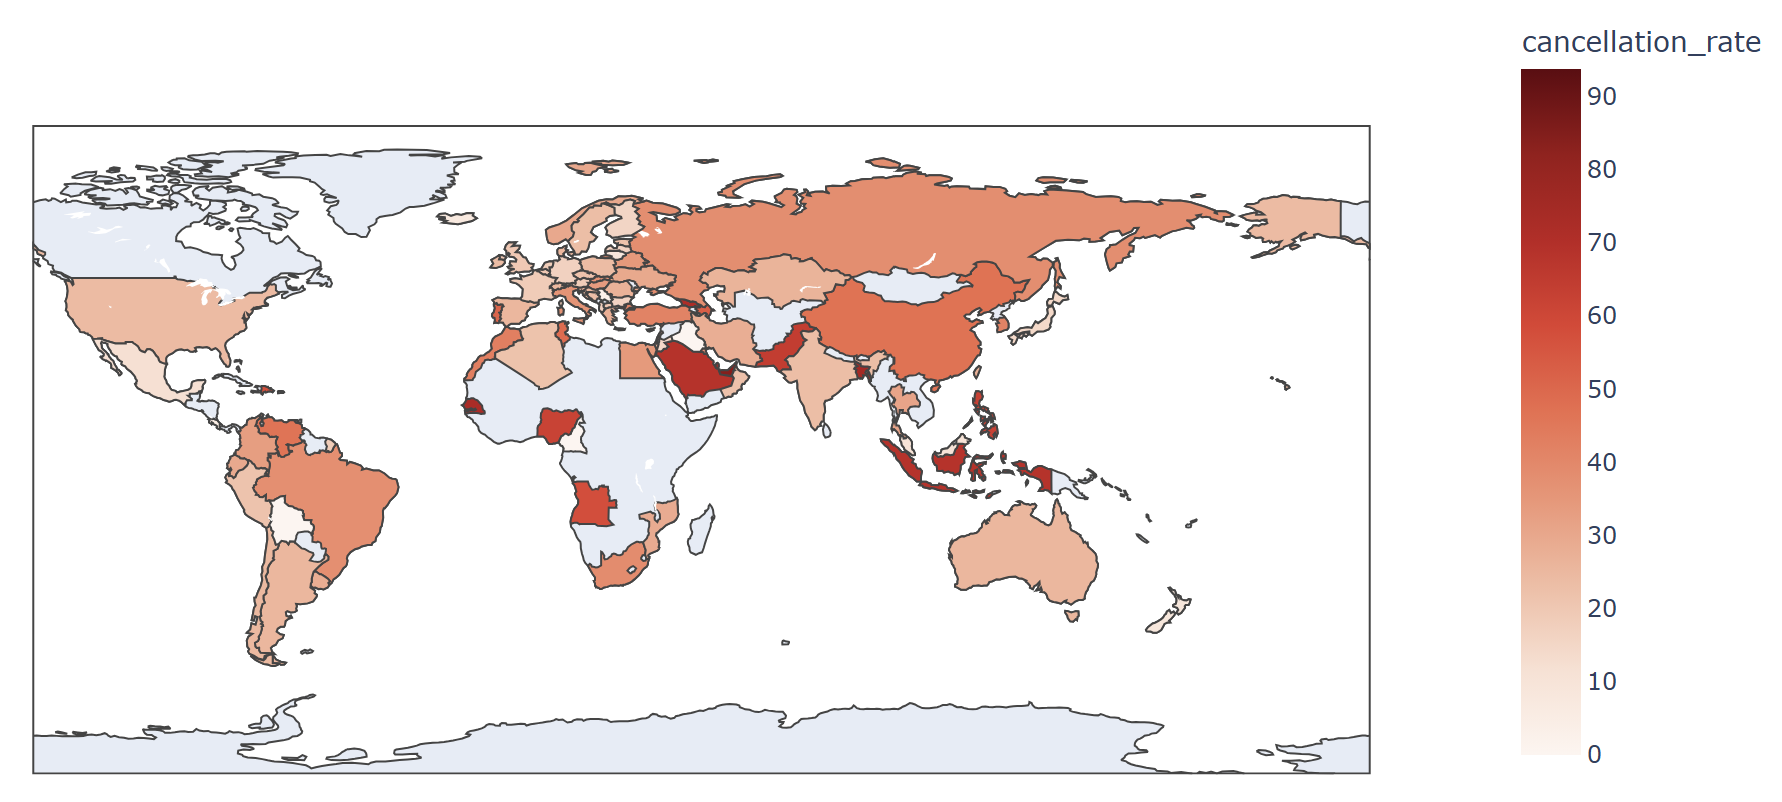

지도를 바탕으로 국가별 시각화 해본 결과, <br>
**동남아시아, 아랍권 등 취소율이 높은 특정 국가들을 확인**할 수 있었다.

### **3. 특별 요청 횟수와 예약 취소율 간의 관계**

In [40]:
special_requests_cancellation = df.groupby('total_of_special_requests')['is_canceled'].agg(['count', 'sum']).reset_index()
special_requests_cancellation.columns = ['total_special_requests', 'total_reservations', 'canceled_reservations']

# 특별 요청 횟수별 취소율
special_requests_cancellation['cancellation_rate'] = (special_requests_cancellation['canceled_reservations'] / special_requests_cancellation['total_reservations']) * 100

special_requests_cancellation

,total_special_requests,total_reservations,canceled_reservations,cancellation_rate
0,0,62503,26948,43.114730
1,1,32304,6968,21.570084
2,2,12595,2713,21.540294
3,3,2423,413,17.044986
4,4,331,36,10.876133
5,5,39,2,5.128205


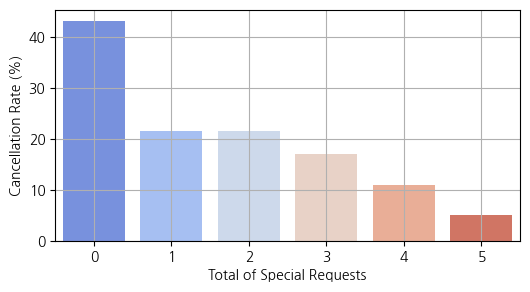

In [41]:
plt.figure(figsize=(6, 3))
sns.barplot(data=special_requests_cancellation, x='total_special_requests', y='cancellation_rate', palette='coolwarm')

plt.xlabel('Total of Special Requests')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.show()

특별 요청 횟수가 늘어날수록 예약 취소율이 높을 것이라고 예상한 것과 다르게, <br>
**특별 요청 횟수가 적을수록 예약 취소율이 높은 것을 확인**할 수 있다.

### **4. 중간 업체와 예약 취소율 간의 관계**

In [42]:
# Direct 예약 취소율
direct_reservations = df[(df['agent'] == '0') & (df['company'] == '0')]
direct_cancellation_rate = direct_reservations['is_canceled'].mean() * 100

# Agent/Company 예약 취소율
agent_company_reservations = df[(df['agent'] != '0') | (df['company'] != '0')]
agent_company_cancellation_rate = agent_company_reservations['is_canceled'].mean() * 100

print(f"Direct: {direct_cancellation_rate:.2f}%")
print(f"Agent/Company: {agent_company_cancellation_rate:.2f}%")


Direct: 16.07%
Agent/Company: 34.77%


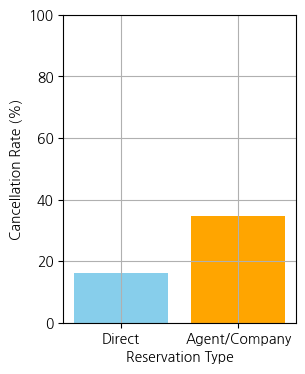

In [43]:
reservation_types = ['Direct', 'Agent/Company']
cancellation_rates = [direct_cancellation_rate, agent_company_cancellation_rate]

plt.figure(figsize=(3, 4))
plt.bar(reservation_types, cancellation_rates, color=['skyblue', 'orange'])
plt.xlabel('Reservation Type')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

이를 통해 Direct로 예약한 고객보다 **Agent/Company를 거쳐서 예약한 고객의 취소율이 높은 것**을 알 수 있다.

### **5. 예약된 성인 고객의 수와 예약 취소율 간의 관계**

In [127]:
adults_cancellation = df.groupby('adults')['is_canceled'].agg(['count', 'sum']).reset_index()
adults_cancellation.columns = ['adults', 'total_reservations', 'canceled_reservations']

# 성인 고객 수별 취소율 계산
adults_cancellation['cancellation_rate'] = (adults_cancellation['canceled_reservations'] / adults_cancellation['total_reservations']) * 100

adults_cancellation

,adults,total_reservations,canceled_reservations,cancellation_rate
0,0,219,82,37.442922
1,1,20766,5251,25.286526
2,2,83037,29609,35.657598
3,3,6095,2106,34.552912
4,4,62,16,25.806452
5,5,2,2,100.000000
6,6,1,1,100.000000
7,10,1,1,100.000000
8,20,2,2,100.000000
9,26,5,5,100.000000


In [128]:
# 성인 고객 10명 이상은 '10+'로 그룹화
adults_cancellation['adults_group'] = adults_cancellation['adults'].apply(lambda x: '10+' if x >= 10 else str(x))

adults_grouped = adults_cancellation.groupby('adults_group').agg({'total_reservations': 'sum', 'canceled_reservations': 'sum'}).reset_index()

# 그룹별 취소율
adults_grouped['cancellation_rate'] = (adults_grouped['canceled_reservations'] / adults_grouped['total_reservations']) * 100

adults_grouped

,adults_group,total_reservations,canceled_reservations,cancellation_rate
0,0,219,82,37.442922
1,1,20766,5251,25.286526
2,10+,13,13,100.000000
3,2,83037,29609,35.657598
4,3,6095,2106,34.552912
5,4,62,16,25.806452
6,5,2,2,100.000000
7,6,1,1,100.000000


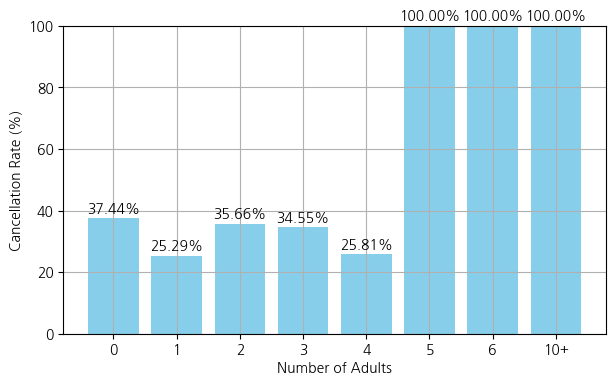

In [135]:
# adults_group을 오름차순으로 정렬
adults_grouped = adults_grouped.sort_values(by='adults_group', key=lambda x: x.str.replace('+', '').astype(int))

plt.figure(figsize=(7, 4))
plt.bar(adults_grouped['adults_group'], adults_grouped['cancellation_rate'], color='skyblue')

plt.xlabel('Number of Adults')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, 100)
plt.grid(True)

for i, rate in enumerate(adults_grouped['cancellation_rate']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', va='bottom')

plt.show()

**성인 고객의 수가 5명 이상일 때부터 취소율은 100%으로 급격히 높아졌다**.<br>
그러나, 성인 고객의 수가 5명 이상인 데이터를 이상치로 본다면 성인 고객의 수와 예약 취소율은 특별한 관계가 없는 것으로도 이해할 수 있다.

### **6. 식사 유형과 예약 취소율 간의 관계**

In [138]:
meal_cancellation = df.groupby('meal')['is_canceled'].agg(['count', 'sum']).reset_index()
meal_cancellation.columns = ['meal', 'total_reservations', 'canceled_reservations']

# 식사 유형별 취소율
meal_cancellation['cancellation_rate'] = (meal_cancellation['canceled_reservations'] / meal_cancellation['total_reservations']) * 100

meal_cancellation

,meal,total_reservations,canceled_reservations,cancellation_rate
0,BB,84716,28595,33.753954
1,FB,677,364,53.766617
2,HB,13313,4011,30.128446
3,SC,10474,3922,37.445102
4,Undefined,1015,188,18.522167


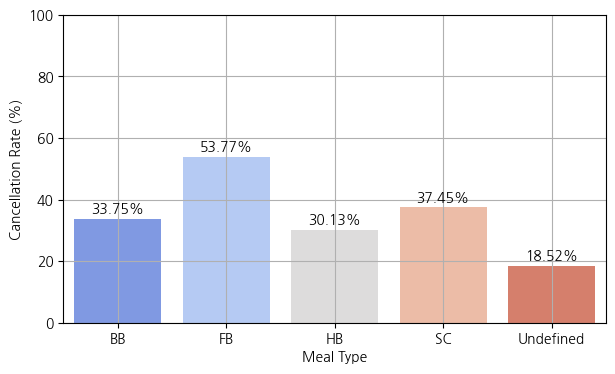

In [140]:
plt.figure(figsize=(7, 4))
sns.barplot(data=meal_cancellation, x='meal', y='cancellation_rate', palette='coolwarm')

plt.xlabel('Meal Type')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, 100)
plt.grid(True)

for i, rate in enumerate(meal_cancellation['cancellation_rate']):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', va='bottom')

plt.show()

식사 유형과 예약 취소율은 큰 연관이 없는 것으로 확인된다.

### **7. 이전 예약 취소 정보와 현재 예약 취소율 간의 관계**

In [45]:
# 이전에 취소한 적이 있는 고객
previous_cancelers = df[df['previous_cancellations'] > 0]

# 현재 예약 상태가 Check-Out이 아닌 경우
not_checked_out = previous_cancelers[previous_cancelers['reservation_status'] != 'Check-Out']

total_previous_cancelers = len(previous_cancelers)
not_checked_out_count = len(not_checked_out)

# 비율 계산
not_checked_out_rate = (not_checked_out_count / total_previous_cancelers) * 100

print(f"이전에 취소한 고객의 수: {total_previous_cancelers}")
print(f"현재 예약이 Canceled or No-Show 상태: {not_checked_out_count}")
print(f"비율: {not_checked_out_rate:.2f}%")

이전에 취소한 고객의 수: 912
현재 예약이 Canceled or No-Show 상태: 452
비율: 49.56%


In [46]:
# 이전에 취소한 적이 없는 고객
previous_non_cancelers = df[df['previous_cancellations'] == 0]

# 현재 예약 상태가 Check-Out이 아닌 경우
not_checked_out_non_cancelers = previous_non_cancelers[previous_non_cancelers['reservation_status'] != 'Check-Out']

total_previous_non_cancelers = len(previous_non_cancelers)
not_checked_out_non_cancelers_count = len(not_checked_out_non_cancelers)

# 비율 계산
not_checked_out_non_cancelers_rate = (not_checked_out_non_cancelers_count / total_previous_non_cancelers) * 100

print(f"이전에 취소하지 않은 고객의 수: {total_previous_non_cancelers}")
print(f"현재 예약이 Canceled or No-Show 상태: {not_checked_out_non_cancelers_count}")
print(f"비율: {not_checked_out_non_cancelers_rate:.2f}%")

이전에 취소하지 않은 고객의 수: 109283
현재 예약이 Canceled or No-Show 상태: 36628
비율: 33.52%


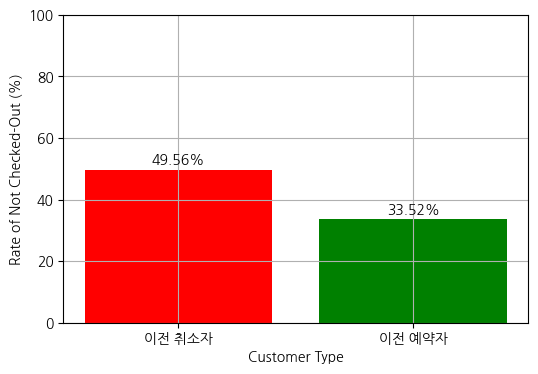

In [49]:
labels = ['이전 취소자', '이전 예약자']
values = [not_checked_out_rate, not_checked_out_non_cancelers_rate]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['red', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.xlabel('Customer Type')
plt.ylabel('Rate of Not Checked-Out (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

**이전에 예약을 취소한 고객들은 현재 예약도 취소할 확률이 높은 것**으로 나타났다.

---

# ✔️ 5. 예약 취소율을 개선하는 방법

1) Resort Hotel에 비해 City Hotel의 예약 취소율이 높기 때문에 **City Hotel 관리에 집중**해야 한다.

2) 대기일(Lead Time) 증가 시 예약 취소율이 높아지는 문제
> - 대기일이 긴 고객에게는 **예약을 잊지 않도록 리마인드 문자**를 보낸다.
> - **대기일이 30일 이상인 경우에는 보증금을 요구**하여 고객이 여러 호텔을 동시에 예약하는 것을 방지한다.

3) 특정 국적(동남아시아, 아랍권 등) 고객의 예약 취소율이 높은 문제
> - 추후 해당 국적을 가진 고객의 예약이 발생할 경우, 주의 깊게 살피는 등 **국가별 고객 맞춤 서비스를 제공**해야 한다.

4) Direct로 예약한 고객보다 Agent/Company를 거칠 때 고객의 예약 취소율이 높은 문제
> - Direct로 **직접 예약하도록 호텔 자체 패키지 서비스를 제공**해야 한다.
> - Agent/Company에 **호텔 정보가 어떻게 등록되어 있는지 점검**해야 한다.

5) 성인 고객의 수가 5명 이상일 때부터 예약 취소율이 높아지는 문제
> - **단체 예약 할인 패키지를 제공**해야 한다.
> - 많은 인원을 수용할 수 있는 **전용 이벤트 룸**을 만든다.

6) 이전에 예약을 취소한 적 있는 고객이 현재 예약도 취소할 확률이 높은 문제
> - 예약 취소 이력이 여러번 있는 고객이 재예약을 할 경우, **보증금을 부과**해야 한다.